In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import glob

from scipy.stats import describe
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
LABELS = ["isFraud"]
all_files = glob.glob("../input/blendings/*.csv")
all_files = all_files[13:]
all_files.append(glob.glob("../input/blending2/*.csv")[0])
# all_files.append(glob.glob("../input/blending3/*.csv")[0])
all_files.append(glob.glob("../input/blending4/*.csv")[0])
all_files.append(glob.glob("../input/blending5/*.csv")[0])
all_files.append(glob.glob("../input/blending6/*.csv")[0])
scores = np.zeros(len(all_files))
for i in range(len(all_files)):
    scores[i] = float('.'+all_files[i].split(".")[3])
    print(i,scores[i],all_files[i])

0 0.949 ../input/blendings/submission_0.9490.csv
1 0.9458 ../input/blendings/submission_0.9458.csv
2 0.9494 ../input/blending2/submission_0.9494.csv
3 0.9473 ../input/blending4/submission_0.9473.csv
4 0.9527 ../input/blending5/submission_0.9527.csv
5 0.9532 ../input/blending6/submission_0.9532.csv


In [3]:
describe(scores)

DescribeResult(nobs=6, minmax=(0.9458, 0.9532), mean=0.9495666666666667, variance=8.538666666666745e-06, skewness=0.1181333732846574, kurtosis=-1.359205198889972)

In [4]:
top = scores.argsort()[-4:][::-1]
for i, f in enumerate(top):
    print(i,scores[f],all_files[f])

0 0.9532 ../input/blending6/submission_0.9532.csv
1 0.9527 ../input/blending5/submission_0.9527.csv
2 0.9494 ../input/blending2/submission_0.9494.csv
3 0.949 ../input/blendings/submission_0.9490.csv


In [5]:

outs = [pd.read_csv(all_files[f], index_col=0) for f in top]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "m" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)

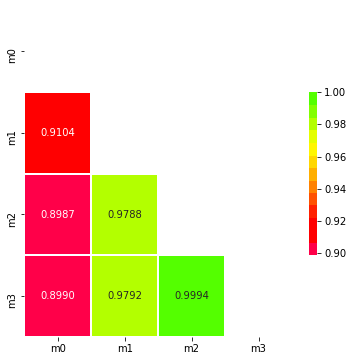

In [6]:
# check correlation
corr = concat_sub.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(len(cols)+2, len(cols)+2))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr,mask=mask,cmap='prism',center=0, linewidths=1,
            annot=True,fmt='.4f', cbar_kws={"shrink":.5})

In [7]:
rank = np.tril(concat_sub.iloc[:,1:].corr().values,-1)
m = (rank>0).sum() - (rank>0.99).sum()
m_gmean, s = 0, 0
for n in range(m):
    mx = np.unravel_index(rank.argmin(), rank.shape)
    w = (m-n)/m
    m_gmean += w*(np.log(concat_sub.iloc[:,mx[0]+1])+np.log(concat_sub.iloc[:,mx[1]+1]))/2
    s += w
    rank[mx] = 1
m_gmean = np.exp(m_gmean/s)

In [8]:
m_gmean = (m_gmean-m_gmean.min())/(m_gmean.max()-m_gmean.min())
describe(m_gmean)

DescribeResult(nobs=506691, minmax=(0.0, 1.0), mean=0.02205464108480675, variance=0.011547287957807531, skewness=7.639687667870483, kurtosis=60.047094238603336)

In [9]:
concat_sub['isFraud'] = m_gmean
concat_sub[['TransactionID','isFraud']].to_csv('stack_gmean.csv',index=False)

In [10]:
## 다 더해보기

In [11]:
# top = scores.argsort()[-4:][::-1]
# for i, f in enumerate(top):
#     print(i,scores[f],all_files[f])
# outs = [pd.read_csv(all_files[f], index_col=0) for f in top]
# # concat_sub = pd.concat(outs, axis=1)
# for i in range(len(outs)):
#     if i ==0 : submit = outs[0]
#     else :
#         submit += outs[i]
# submit.to_csv('submission.csv')

In [12]:
select = [16,15,2,14]
scores = [0.9518,0.9494,0.9476,0.9458]
scores = [x/sum(scores) for x in scores]
scores


blending = [pd.read_csv(all_files[f], index_col=0) for f in select]
sub_1 = blending[0].copy()
for i, score in enumerate(scores) :
    sub_1['isFraud'] += score*blending[i]['isFraud']

sub_1.to_csv('weighted.csv')

IndexError: list index out of range

In [13]:
# 7:3으로 섞어보기
select = [16,15]
scores = [0.9518,0.9494]
ratio = [0.7,0.3]
blending = [pd.read_csv(all_files[f], index_col=0) for f in select]
sub_1 = blending[0].copy()
sub_1['isFraud'] = 0.7*blending[0]['isFraud'] + 0.3*blending[1]['isFraud']
sub_1.to_csv('weighted2.csv')


IndexError: list index out of range